# Session 17: K-Nearest Neighbors & Classification Metrics


Welcome to Session 17! In this notebook, we'll explore the **K-Nearest Neighbors (KNN)** algorithm and understand **classification evaluation metrics** in detail.

We'll use **binary classification examples** for better clarity and intuition.


## 📘 Part 1: K-Nearest Neighbors (KNN)


### 🤖 KNN Intuition

- **KNN** is a simple, non-parametric, lazy learning algorithm.
- It makes predictions based on the **'K' closest training examples** in the feature space.
- It works well for **small to medium datasets**.

📌 **Key Points**:
- No training step (just memorizes the training data).
- Prediction is based on **majority vote** (classification) or average (regression).
- **Distance metric** (usually Euclidean) plays a crucial role.


### 💻 Code Example: Binary Classification using KNN

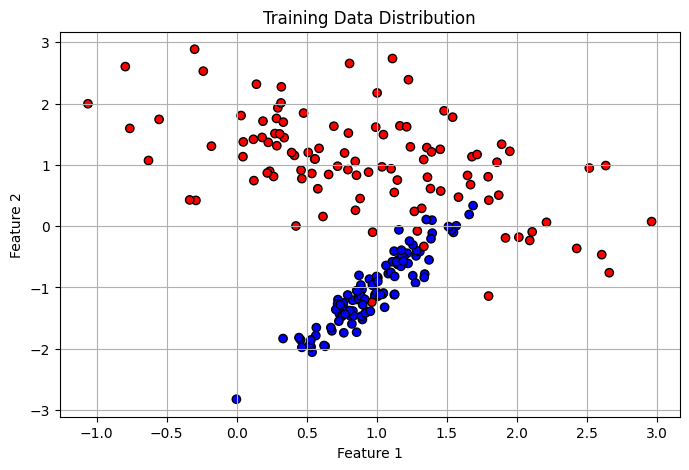

In [1]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Plot the training data
plt.figure(figsize=(8,5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title("Training Data Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


### 🔢 How to Select the Best K?

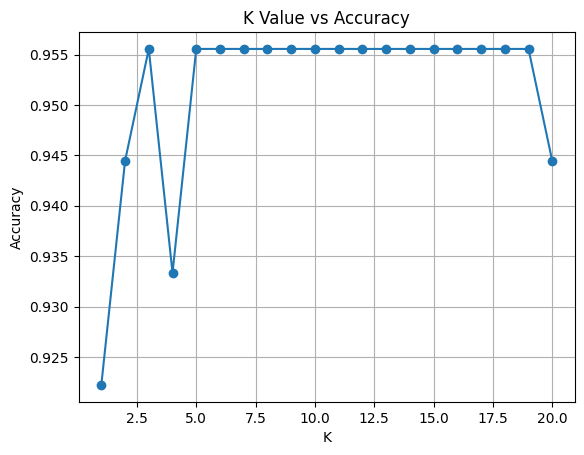

In [2]:

from sklearn.metrics import accuracy_score

# Evaluate accuracy for different values of K
k_values = list(range(1, 21))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_scores.append(knn.score(X_test, y_test))

plt.plot(k_values, accuracy_scores, marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


### 🌐 Decision Surface

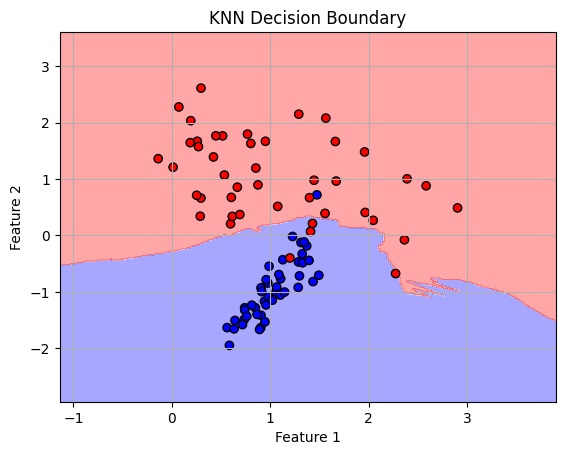

In [3]:

import numpy as np

def plot_decision_boundary(clf, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('KNN Decision Boundary')
    plt.grid(True)
    plt.show()

plot_decision_boundary(knn, X_test, y_test)



### ⚖️ Overfitting vs Underfitting in KNN

- **Overfitting**: When K is too small (e.g., K=1), model becomes too sensitive to noise.
- **Underfitting**: When K is too large, the model becomes too simple and misses patterns.
- Best practice: Use **cross-validation** to choose K.



### ❌ Limitations of KNN

- **Slow predictions** for large datasets.
- **Sensitive to irrelevant features and scale**.
- Struggles with **high-dimensional data (curse of dimensionality)**.


## 📊 Part 2: Classification Metrics - Part 1


### ✅ Accuracy

**Accuracy** = (Correct Predictions) / (Total Predictions)

Accuracy is a useful metric, but not always reliable in **imbalanced datasets**.


In [4]:

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96



### ⚠️ Problem with Accuracy

- Accuracy is misleading when classes are imbalanced.
- For example, predicting all zeros in a dataset with 90% class 0 gives 90% accuracy — but it's useless!


### 🔍 Confusion Matrix

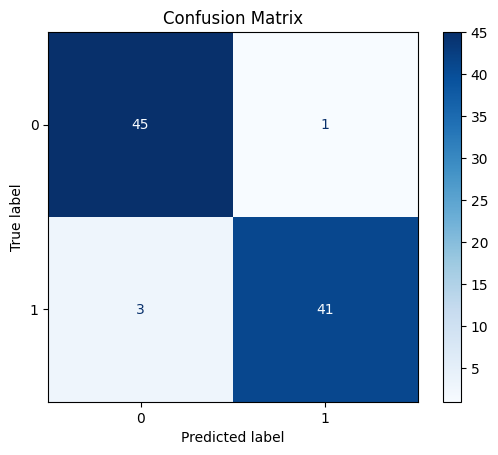

In [5]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## 📈 Part 3: Classification Metrics - Part 2


### 🎯 Precision, Recall, and F1 Score

- **Precision** = TP / (TP + FP)
- **Recall** = TP / (TP + FN)
- **F1 Score** = Harmonic Mean of Precision and Recall

Useful when classes are imbalanced.


In [6]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))


              precision    recall  f1-score   support

     Class 0       0.94      0.98      0.96        46
     Class 1       0.98      0.93      0.95        44

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90




### 📊 Multi-class Precision, Recall, F1

- Scikit-learn handles multi-class by calculating scores for each class and averaging (macro/micro/weighted).
- In this binary example, it shows metrics per class.



## ✅ Summary

- KNN is a simple and effective algorithm but requires careful tuning of K.
- Use visualization and performance metrics to understand model behavior.
- Accuracy alone is not enough. Always examine **precision, recall, and F1 score**.
